<h2>About this Project</h2>

**In this project, you will train a logistic regression classifier on artificial data. Specifically, you will implement functions to calculate the gradient of the logistic loss function and perform gradient descent.** You will use the classifier in the final project to create a logistic regression classifier that can "filter" spam email messages.

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board (found in the Live Labs section of this course) to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
    <li><strong>Save your notebook —</strong> Click <strong>Save and Checkpoint</strong> in the "File" menu.</li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

from helper import *

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


First, let's load artificial data and visualize the classes.

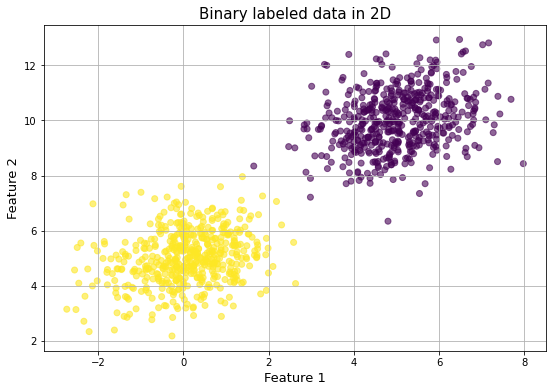

In [2]:
np.random.seed(12)
n_samples = 500

covariance = [[1, .25],
              [.25, 1]]
class_one = np.random.multivariate_normal(mean=[5, 10], cov=covariance, size=n_samples)
class_one_labels = -np.ones(n_samples)

class_two = np.random.multivariate_normal(mean=[0, 5], cov=covariance, size=n_samples)
class_two_labels = np.ones(n_samples)

features = np.vstack((class_one, class_two))
labels = np.hstack((class_one_labels, class_two_labels))

plt.figure(figsize=(9, 6))
plt.scatter(features[:, 0], features[:, 1],
            c=labels, alpha=.6);

plt.title("Binary labeled data in 2D", size=15);
plt.xlabel("Feature 1", size=13);
plt.ylabel("Feature 2", size=13);
plt.grid();

## Build a Spam Email Classifier - Project 2 (Gradient Descent)

In the last project, you implemented the `sigmoid`, `y_pred` for $P(y_i = 1 | \mathbf{x}_i ; \mathbf{w}, b)$, and `log_loss` for negative log likelihood functions. In this project, you will use them to finish your logistic regression classifier. For the classifier, you will implement the gradient and a "training" function that does gradient descent.

### Part One: Compute Gradient [Graded]

First, verify that the gradient of the log-loss with respect to the weight vector is:
$$
\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial \mathbf{w}}=\sum_{i=1}^n -y_i \sigma \left( -y_i \left( \mathbf{w}^\top\mathbf{x}_i + b \right) \right) \mathbf{x}_i
$$

$$
\frac{\partial NLL(\mathbf{X},\mathbf{y},\mathbf{w}, b)}{\partial b}=\sum_{i=1}^n - y_i \sigma \left(-y_i \left( \mathbf{w}^\top\mathbf{x}_i + b \right) \right)
$$

Implement the function **`gradient`**, which returns the first derivative with respect to `w, b` given `X, y, w, b`. You have access to `sigmoid_grader` function that returns $\sigma(z)$.

<hr>

Recall how we got the expressions for the gradient:
$$
\frac{\partial NLL}{\partial \mathbf{w}} = - \frac{\partial \left[ \sum_{i=1}^n \log \sigma \left( y_i \left(\mathbf{w}^\top \mathbf{x}_i + b \right) \right) \right]}{\partial \mathbf{w}}
= - \sum_{i=1}^n \frac{\partial \left[ \log \sigma \left( y_i \left(\mathbf{w}^\top \mathbf{x}_i + b \right) \right) \right]}{\partial \mathbf{w}}
= - \sum_{i=1}^n \frac{1}{\sigma \left( y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right)}  \frac{\partial \left[ \sigma \left( y_i \left(\mathbf{w}^\top \mathbf{x}_i + b \right) \right) \right]}{\partial \mathbf{w}}
= - \sum_{i=1}^n \frac{\sigma' \left( y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right)}{\sigma \left( y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right)} \cdot y_i \mathbf{x}_i.
$$

Since we know that $\sigma'(z)=\sigma(z)(1-\sigma(z))$ and that $1-\sigma(z) = \sigma(-z)$, our expression finally becomes:
$$
\frac{\partial NLL}{\partial \mathbf{w}} = - \sum_{i=1}^n \sigma \left( - y_i \left( \mathbf{w}^\top \mathbf{x}_i + b \right) \right) \cdot y_i \mathbf{x}_i.
$$

You can similarly derive the gradient w.r.t. $b$ as an exercise.

In [15]:
#test
X = np.random.rand(25,5) # generate n random vectors with d dimensions
w = np.random.rand(5) # define a random weight vector
b = np.random.rand(1) # define a bias
y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
grad = -1*(sigmoid_grader(-y*(np.dot(X,w.T)+b))*y)
wgrad=np.dot(X.T,grad)
bgrad=np.sum(grad)
print(grad)
print(wgrad)
print(bgrad)

[ 0.92888021 -0.05340992  0.81776959  0.79181848 -0.05952479  0.94959077
  0.89336409  0.92190805 -0.19270753  0.87557145 -0.11724563 -0.09162194
  0.84043453 -0.12786224 -0.04228816 -0.10711464  0.89969884  0.93646927
 -0.08929869 -0.09066097  0.89940092 -0.10372443 -0.06716774  0.86770586
 -0.0443188 ]
[4.18859618 3.92771324 5.26716509 4.72496322 5.26178517]
9.435666604635006


In [18]:
#test
print(sigmoid_grader(10))

0.9999546021312976


In [4]:
#first try
#wgrad=-(np.dot(sigmoid_grader(-y*(np.dot(X,w.T)+b)), (np.dot(y,X))))
#bgrad=-(np.sum(sigmoid_grader(-y*(np.dot(X,w.T)+b))))

In [26]:
#second
#def gradient(X, y, w, b):
    #'''
    #Calculates the gradients of NLL w.r.t. w and b and returns (w_grad, bgrad).
    
   # Input:
        #: data matrix of shape nxd
#        y: n-dimensional vector of labels (+1 or -1)
#        w: d-dimensional weight vector
#        b: scalar bias term
    
#    Output:
#        wgrad: d-dimensional vector (gradient vector of w)
#        bgrad: a scalar (gradient of b)
#    '''    
#    n, d = X.shape
#    wgrad = np.zeros(d)
#    bgrad = 0.0
    
#    # YOUR CODE HERE
#    grad = -(sigmoid_grader(-y*(np.dot(X,w.T)+b))*y)
#    wgrad=np.dot(X.T,-(sigmoid_grader(-y*(np.dot(X,w.T)+b))*y))
#    bgrad=np.sum(-(sigmoid_grader(-y*(np.dot(X,w.T)+b))*y))
#   return wgrad,bgrad
#    raise NotImplementedError()

In [32]:
#final
def gradient(X, y, w, b):
    '''
    Calculates the gradients of NLL w.r.t. w and b and returns (w_grad, bgrad).
    
    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of labels (+1 or -1)
        w: d-dimensional weight vector
        b: scalar bias term
    
    Output:
        wgrad: d-dimensional vector (gradient vector of w)
        bgrad: a scalar (gradient of b)
    '''    
    n, d = X.shape
    wgrad = np.zeros(d)
    bgrad = 0.0
    
    # YOUR CODE HERE
    grad = -(sigmoid_grader(-y*(np.dot(X,w.T)+b))*y)
    wgrad=np.dot(X.T,grad)
    bgrad=np.sum(grad)
    return wgrad,bgrad
    raise NotImplementedError()

In [33]:
def test_grad1():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    wgrad, bgrad = gradient(X, y, w, b) # compute the gradient using your function
    
    return wgrad.shape == w.shape and np.isscalar(bgrad)


def test_grad2():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) # define a bias
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    wgrad, bgrad = gradient(X, y, w, b) # compute the gradient using your function
    wgrad2, bgrad2 = gradient_grader(X, y, w, b) # compute the gradient using ground truth
    return np.linalg.norm(wgrad - wgrad2)<1e-06 and np.linalg.norm(bgrad - bgrad2) < 1e-06 # test if they match

def test_grad3():
    X = np.random.rand(25,5) # generate n random vectors with d dimensions
    y = (np.random.rand(25)>0.5)*2-1 # set labels all-(+1)
    w = np.random.rand(5) # define a random weight vector
    b = np.random.rand(1) 

    w_s = np.random.rand(5)*1e-05 # define tiny random step 
    b_s = np.random.rand(1)*1e-05 # define tiny random step 
    ll1 = log_loss_grader(X,y,w+w_s, b+b_s)  # compute log-likelihood after taking a step
    
    ll = log_loss_grader(X,y,w,b) # use Taylor's expansion to approximate new loss with gradient
    wgrad, bgrad = gradient(X,y,w,b) # compute gradient
    ll2 = ll+ wgrad@w_s + bgrad*b_s # take linear step with Taylor's approximation
    return np.linalg.norm(ll1-ll2)<1e-05 # test if they match

def test_grad4():
    w1, b1, losses1 = logistic_regression_grader(features, labels, 1000, 1e-03, gradient)
    w2, b2, losses2 = logistic_regression_grader(features, labels, 1000, 1e-03)
    return(np.abs(losses1[-1]-losses2[-1])<0.1)

runtest(test_grad1, 'test_grad1')
runtest(test_grad2, 'test_grad2')
runtest(test_grad3, 'test_grad3')
runtest(test_grad4, 'test_grad4')

Running Test: test_grad1 ... ✔ Passed!
Running Test: test_grad2 ... ✔ Passed!
Running Test: test_grad3 ... ✔ Passed!
Running Test: test_grad4 ... ✔ Passed!


In [28]:
# Autograder test cell - worth 1 point
# runs test_grad 1

In [29]:
# Autograder test cell - worth 1 point
# runs test_grad2

In [30]:
# Autograder test cell - worth 1 point
# runs test_grad3

In [31]:
# Autograder test cell - worth 1 point
# runs test_grad4

### Part Two: Weight Update of Gradient Ascent [Graded]

Implement **`logistic_regression`** to train your classifier using gradient descent with learning rate `alpha` for `max_iter` iterations. You have access to `gradient(X, y, w, b)` and `log_loss_grader(X, y, w, b)` functions. `gradient` returns `wgrad, bgrad` and `log_loss_grader` returns `nll` scalar. Please use a **constant** learning rate `alpha` throughout (i.e. do not decrease the learning rate).

The idea here is to iteratively update `w` and `b`:

<center><img src="logistic_regression_pseudocode.png" width="75%" /></center>

In [54]:
def logistic_regression(X, y, max_iter, alpha):
    '''
    Trains the logistic regression classifier on data X and labels y using gradient descent for max_iter iterations with learning rate alpha.
    Returns the weight vector, bias term, and losses at each iteration AFTER updating the weight vector and bias.
    
    Input:
        X: data matrix of shape nxd
        y: n-dimensional vector of data labels (+1 or -1)
        max_iter: number of iterations of gradient descent to perform
        alpha: learning rate for each gradient descent step
        
    Output:
        w, b, losses
        w: d-dimensional weight vector
        b: scalar bias term
        losses: max_iter-dimensional vector containing negative log likelihood values AFTER a gradient descent in each iteration
    '''
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = np.zeros(max_iter)    
   
    for step in range(max_iter):
        # YOUR CODE HERE
        wgrad,bgrad = gradient(X,y,w,b)
        w=w-np.dot(alpha,wgrad)
        b=b-np.dot(alpha,bgrad)
        losses[step]=log_loss_grader(X,y,w,b)
    return w, b, losses
    raise NotImplementedError()



In [55]:
def test_logistic_regression1():

    XUnit = np.array([[-1,1],[-1,0],[0,-1],[-1,2],[1,-2],[1,-1],[1,0],[0,1],[1,-2],[-1,2]])
    YUnit = np.hstack((np.ones(5), -np.ones(5)))

    w1, b1, _ = logistic_regression(XUnit, YUnit, 30000, 5e-5)
    w2, b2, _ = logistic_regression_grader(XUnit, YUnit, 30000, 5e-5)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

def test_logistic_regression2():
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 300
    alpha = 1e-5
    w1, b1, _ = logistic_regression(X, Y, max_iter, alpha)
    w2, b2, _ = logistic_regression_grader(X, Y, max_iter, alpha)
    return (np.linalg.norm(w1 - w2) < 1e-5) and (np.linalg.norm(b1 - b2) < 1e-5)

def test_logistic_regression3(): # check if losses match predictions
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 30
    alpha = 1e-5
    w1, b1, losses1 = logistic_regression(X, Y, max_iter, alpha)
    return np.abs(log_loss_grader(X,Y,w1,b1)-losses1[-1])<1e-09

def test_logistic_regression4(): # check if loss decreases
    X = np.vstack((np.random.randn(50, 5), np.random.randn(50, 5) + 2))
    Y = np.hstack((np.ones(50), -np.ones(50)))
    max_iter = 30
    alpha = 1e-5
    w1, b1, losses = logistic_regression(X, Y, max_iter, alpha)
    return losses[-1]<losses[0]

runtest(test_logistic_regression1, 'test_logistic_regression1')
runtest(test_logistic_regression2, 'test_logistic_regression2')
runtest(test_logistic_regression3, 'test_logistic_regression3')
runtest(test_logistic_regression4, 'test_logistic_regression4')

Running Test: test_logistic_regression1 ... ✔ Passed!
Running Test: test_logistic_regression2 ... ✔ Passed!
Running Test: test_logistic_regression3 ... ✔ Passed!
Running Test: test_logistic_regression4 ... ✔ Passed!


In [56]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression1

In [57]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression2

In [58]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression3

In [59]:
# Autograder test cell - worth 1 point
# runs test_logistic_regression4

Now run your implementation on the artificial data from the top of the notebook.  Check your code by plotting the values of the negative log likelihood - should these values increase or decrease as the number of iterations grows? Do your values move in the right direction?

You can tune `max_iter` and `alpha` to see how they affect convergence!  

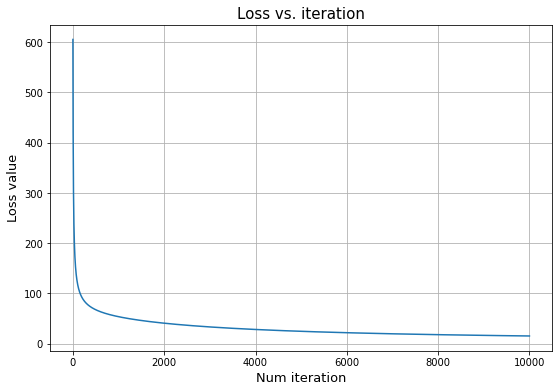

In [60]:
max_iter = 10000
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)
plt.grid()

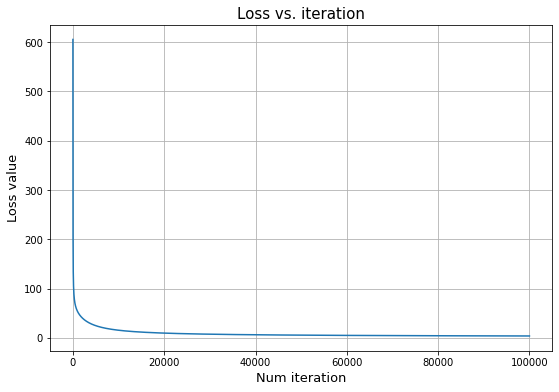

In [61]:
max_iter = 100000
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)
plt.grid()

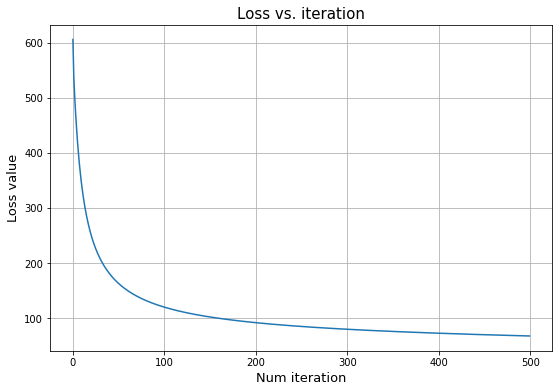

In [62]:
max_iter = 500
alpha = 1e-4
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)
plt.grid()

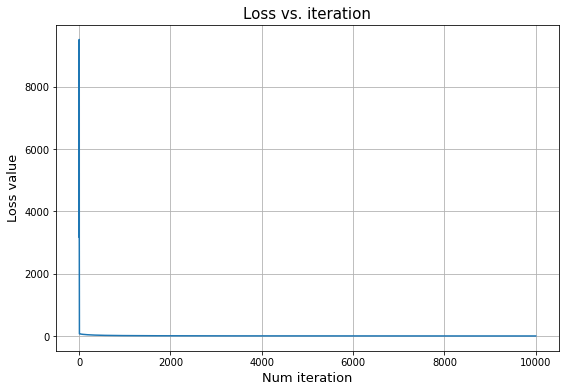

In [63]:
max_iter = 10000
alpha = 1e-3
final_w, final_b, losses = logistic_regression(features, labels, max_iter, alpha)

plt.figure(figsize=(9, 6))
plt.plot(losses)
plt.title("Loss vs. iteration", size=15)
plt.xlabel("Num iteration", size=13)
plt.ylabel("Loss value", size=13)
plt.grid()

Below, we'll take the final weights from the logistic solver and predict labels for the entire dataset.  By plotting the results, we can get a sense of where the linear decision boundary lies.

What do you notice? What could be changed to further improve the accuracy of the classifier? (_Hint: take a look at the second video in Module 1._)

(-3.0, 10.0, 0.0, 15.0)

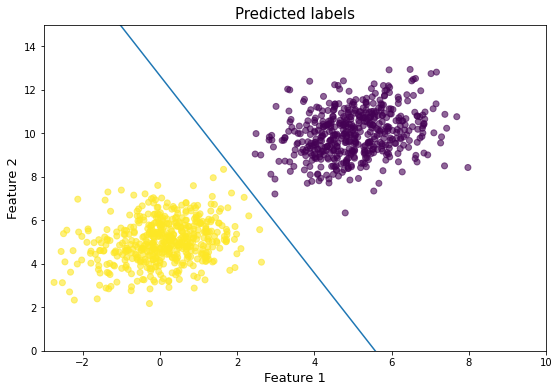

In [64]:
scores = y_pred_grader(features, final_w, final_b)

pred_labels = (scores > 0.5).astype(int)
pred_labels[pred_labels != 1] = -1

plt.figure(figsize=(9, 6))

# plot the decision boundary 
x = np.linspace(np.amin(features[:, 0]), np.amax(features[:, 0]), 10)
y = -(final_w[0] * x + final_b)/ final_w[1] 
plt.plot(x, y)

plt.scatter(features[:, 0], features[:, 1],
            c=pred_labels, alpha=.6)
plt.title("Predicted labels", size=15)
plt.xlabel("Feature 1", size=13)
plt.ylabel("Feature 2", size=13)
plt.axis([-3, 10,0,15])